In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car_df = pd.read_csv('cars.csv')

In [3]:
brand_df = pd.read_csv('brand.csv')

In [4]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [5]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [7]:
import pandas as pd
import numpy as np

# 이미 읽어 놓으신 car_df, brand_df를 그대로 사용한다는 전제입니다.
# ────────────────────────────────────────────────────────────
# 1) brand_df - 브랜드명을 소문자로 정규화
brand_df["title"] = brand_df["title"].str.lower()

# 2) car_df - title 에서 첫 단어(브랜드) 추출 → 소문자 변환
car_df["brand_key"] = (
    car_df["title"]
      .str.split()         # 공백 기준 분리
      .str[0]              # 첫 토큰(브랜드)
      .str.lower()         # 소문자
)

# 3) 병합: car_df.left_on = brand_key, brand_df.right_on = title
merged_df = (
    car_df
      .merge(
          brand_df,
          left_on="brand_key",
          right_on="title",
          how="left",       # car_df 행을 모두 보존
          suffixes=("", "_brand")
      )
      .drop(columns=["brand_key", "title_brand"])  # 보조열 정리
)

# 4) 결과 확인
merged_df.head()


,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom


In [8]:
merged_df["Engine_cc"] =(
    merged_df["Engine"]
        .str.replace("L","", regex=False)
        .astype(float)
)

merged_df["Emiision_Class_Num"] = (
    merged_df["Emission Class"]
        .str.extract(r"(\d+)")
        .astype(float)
)

In [9]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country,Engine_cc,Emiision_Class_Num
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic,1.4,6.0
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom,1.2,4.0
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea,1.4,5.0
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom,1.4,4.0
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom,1.3,5.0


In [10]:
merged_df = merged_df.drop(columns=["Engine_cc"])

In [12]:
merged_df = merged_df.drop(columns=["Emiision_Class_Num"])

In [13]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom


In [14]:
merged_df["Engine"] = merged_df["Engine"].str.replace("L", "", regex=False).astype(float)

In [15]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,NaN,United Kingdom


In [16]:
merged_df["Emission Class"] = merged_df["Emission Class"].str.extract(r"(\d+)").astype(float)

In [17]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,NaN,United Kingdom


In [18]:
merged_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,NaN,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,NaN,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,NaN,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,Japan


In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [23]:
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = merged_df[numeric_cols]

In [24]:
merged_copy = merged_df.drop(['title', 'Fuel type', 'Body type', 'Gearbox','Service history','country'], axis = 1, inplace = True)

In [28]:
merged_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
0,6900,70189,2016,3.0,1.4,5.0,5.0,6.0
1,1495,88585,2008,4.0,1.2,3.0,5.0,4.0
2,949,137000,2011,NaN,1.4,5.0,5.0,5.0
3,2395,96731,2010,5.0,1.4,3.0,4.0,4.0
4,1000,85000,2013,NaN,1.3,5.0,5.0,5.0


In [29]:
rs.fit(merged_df)

RobustScaler()

In [30]:
rs_df = pd.DataFrame(rs.transform(merged_df), columns = merged_df.columns)

In [31]:
rs_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
0,0.526794,-0.213208,0.533333,0.0,-0.333333,0.0,0.0,0.5
1,-0.455041,0.186566,-0.533333,0.5,-0.666667,-1.0,0.0,-0.5
2,-0.554223,1.238700,-0.133333,NaN,-0.333333,0.0,0.0,0.0
3,-0.291553,0.363591,-0.266667,1.0,-0.333333,-1.0,-1.0,-0.5
4,-0.544959,0.108658,0.133333,NaN,-0.500000,0.0,0.0,0.0


In [32]:
mm.fit(merged_df)

MinMaxScaler()

In [34]:
mm_df = pd.DataFrame(mm.transform(merged_df), columns = merged_df.columns)

In [35]:
mm_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
0,0.194030,0.063227,0.875000,0.250,0.109091,1.000000,0.6,1.0
1,0.032687,0.079798,0.763889,0.375,0.072727,0.333333,0.6,0.6
2,0.016388,0.123412,0.805556,NaN,0.109091,1.000000,0.6,0.8
3,0.059552,0.087136,0.791667,0.500,0.109091,0.333333,0.4,0.6
4,0.017910,0.076569,0.833333,NaN,0.090909,1.000000,0.6,0.8


In [36]:
ss.fit(merged_df)

StandardScaler()

In [37]:
ss_df = pd.DataFrame(ss.transform(merged_df), columns = merged_df.columns)

In [38]:
ss_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
0,0.248369,-0.282644,0.817401,0.124503,-0.423953,0.687790,0.172750,1.197064
1,-0.958098,0.184119,-0.756876,0.771464,-0.835038,-1.339322,0.172750,-0.999383
2,-1.079973,1.412557,-0.166522,NaN,-0.423953,0.687790,0.172750,0.098840
3,-0.757206,0.390808,-0.363307,1.418425,-0.423953,-1.339322,-1.560449,-0.999383
4,-1.068589,0.093156,0.227047,NaN,-0.629495,0.687790,0.172750,0.098840


In [39]:
merged_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
0,6900,70189,2016,3.0,1.4,5.0,5.0,6.0
1,1495,88585,2008,4.0,1.2,3.0,5.0,4.0
2,949,137000,2011,NaN,1.4,5.0,5.0,5.0
3,2395,96731,2010,5.0,1.4,3.0,4.0,4.0
4,1000,85000,2013,NaN,1.3,5.0,5.0,5.0


In [40]:
import pandas as pd
import numpy as np

brand_df["title"] = brand_df["title"].str.lower()

car_df["brand_key"] = (
    car_df["title"]
      .str.split()         # 공백 기준 분리
      .str[0]              # 첫 토큰(브랜드)
      .str.lower()         # 소문자
)

merged_df = (
    car_df
      .merge(
          brand_df,
          left_on="brand_key",
          right_on="title",
          how="left",       # car_df 행을 모두 보존
          suffixes=("", "_brand")
      )
      .drop(columns=["brand_key", "title_brand"])
)

merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom


In [41]:
summary = (
    merged_df.groupby("Fuel type")            
             .agg(                            
                 Avg_Price   = ("Price", "mean"),
                 Avg_Mileage = ("Mileage(miles)", "mean"),
                 Cars_Count  = ("title", "count")
             )                                
)

In [42]:
summary.head()

,Avg_Price,Avg_Mileage,Cars_Count
Fuel type,,,
Diesel,6206.506153,94192.627564,1219
Diesel Hybrid,23220.000000,36795.000000,1
Electric,5942.161290,58131.129032,31
Petrol,5313.400508,75612.663421,2362
Petrol Hybrid,10849.148936,56529.255319,47


In [43]:
merged_df["Service history"] = merged_df["Service history"].fillna("Unknown")

In [44]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,United Kingdom


In [45]:
merged_df["Engine"] = merged_df["Engine"].str.replace("L", "", regex=False).astype(float)
merged_df["Emission Class"] = merged_df["Emission Class"].str.extract(r"(\d+)").astype(float)

In [46]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,United Kingdom


In [47]:
merged_df["brand"] = merged_df["title"].str.split().str[0].str.lower()

brand_count_by_country = (
    merged_df.groupby("country")["brand"]
             .nunique()                 
             .reset_index(name="brand_cnt")
)

brand_count_by_country.head()

,country,brand_cnt
0,Czech Republic,1
1,France,4
2,Germany,6
3,Italy,4
4,Japan,11


In [48]:
brand_count_by_country

,country,brand_cnt
0,Czech Republic,1
1,France,4
2,Germany,6
3,Italy,4
4,Japan,11
5,Malaysia,1
6,Romania,1
7,South Korea,4
8,Spain,1
9,Sweden,2


                      Price  Mileage(miles)  Registration_Year  \
Price              1.000000       -0.500358           0.722971   
Mileage(miles)    -0.500358        1.000000          -0.410781   
Registration_Year  0.722971       -0.410781           1.000000   
Previous Owners   -0.479424        0.316160          -0.501045   
Engine            -0.022692        0.331722          -0.290452   
Doors              0.113335       -0.037024           0.219365   
Seats             -0.027393        0.095271           0.037166   
Emission Class     0.697992       -0.378377           0.920095   

                   Previous Owners    Engine     Doors     Seats  \
Price                    -0.479424 -0.022692  0.113335 -0.027393   
Mileage(miles)            0.316160  0.331722 -0.037024  0.095271   
Registration_Year        -0.501045 -0.290452  0.219365  0.037166   
Previous Owners           1.000000  0.195676 -0.153262 -0.029338   
Engine                    0.195676  1.000000 -0.061935  0.072934 

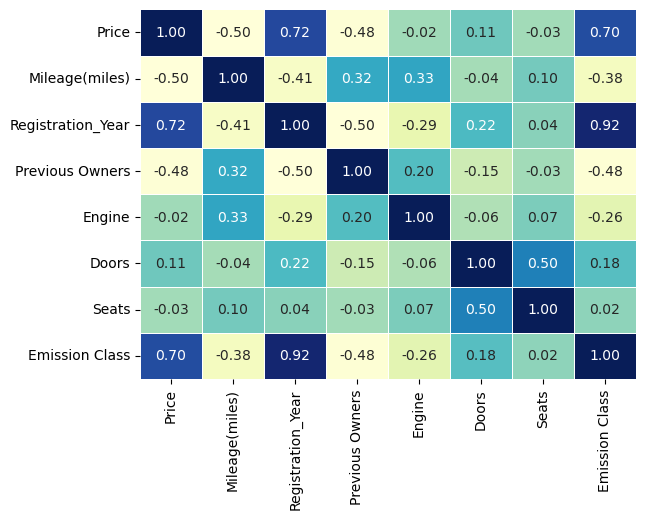

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = merged_df.corr(numeric_only=True)
print(corr_matrix)

sns.heatmap(corr_matrix,
            annot=True, cmap='YlGnBu',
            fmt=".2f", linewidths=0.5,
           cbar=False)
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

numeric_cols = ["Price", "Mileage(miles)", "Registration_Year",
                "Previous Owners", "Doors", "Seats", "Engine", "Emission Class"]

numeric_df = merged_df[numeric_cols].copy()

# 결측치는 중앙값으로 대체
numeric_df = numeric_df.fillna(numeric_df.median(numeric_only=True))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [52]:
pca_full = PCA()
pca_full.fit(scaled_data)

# 누적 설명력 계산
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

# 70% 이상이 되는 최소 주성분 개수 찾기
n_components = (cumulative_variance >= 0.70).argmax() + 1
print(f"누적 설명력 70%를 넘기 위해 필요한 주성분 수: {n_components}")

누적 설명력 70%를 넘기 위해 필요한 주성분 수: 3


In [53]:
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

# 결과를 DataFrame으로 변환
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(n_components)])

In [54]:
pca_df.head()

,PC1,PC2,PC3
0,1.379196,0.454002,-0.290508
1,-1.703088,-0.830273,-1.058718
2,-0.874003,0.857871,-0.545087
3,-1.868512,-1.981114,-0.511663
4,-0.164152,0.561218,-1.022305


In [55]:
print(pca_df.head())

        PC1       PC2       PC3
0  1.379196  0.454002 -0.290508
1 -1.703088 -0.830273 -1.058718
2 -0.874003  0.857871 -0.545087
3 -1.868512 -1.981114 -0.511663
4 -0.164152  0.561218 -1.022305


In [60]:
print(merged_df.describe().T)

# 범주형 빈도
print(merged_df["Fuel type"].value_counts())
print()
print(merged_df["country"].value_counts())

                    count          mean           std     min      25%  \
Price              3687.0   5787.301058   4480.629885   400.0   2490.0   
Mileage(miles)     3687.0  81328.536751  39417.182986     1.0  56984.0   
Registration_Year  3687.0   2011.846216      5.082387  1953.0   2008.0   
Previous Owners    2276.0      2.807557      1.546028     1.0      2.0   
Engine             3642.0      1.606260      0.486584     0.8      1.3   
Doors              3662.0      4.321409      0.986760     2.0      3.0   
Seats              3652.0      4.900329      0.577046     2.0      5.0   
Emission Class     3600.0      4.910000      0.910688     1.0      4.0   

                       50%       75%        max  
Price               4000.0    7995.0    33900.0  
Mileage(miles)     80000.0  103000.0  1110100.0  
Registration_Year   2012.0    2015.5     2025.0  
Previous Owners        3.0       4.0        9.0  
Engine                 1.6       1.9        6.3  
Doors                  5.0       

                      Price  Mileage(miles)  Registration_Year  \
Price              1.000000       -0.500358           0.722971   
Mileage(miles)    -0.500358        1.000000          -0.410781   
Registration_Year  0.722971       -0.410781           1.000000   
Previous Owners   -0.479424        0.316160          -0.501045   
Engine            -0.022692        0.331722          -0.290452   
Doors              0.113335       -0.037024           0.219365   
Seats             -0.027393        0.095271           0.037166   
Emission Class     0.697992       -0.378377           0.920095   

                   Previous Owners    Engine     Doors     Seats  \
Price                    -0.479424 -0.022692  0.113335 -0.027393   
Mileage(miles)            0.316160  0.331722 -0.037024  0.095271   
Registration_Year        -0.501045 -0.290452  0.219365  0.037166   
Previous Owners           1.000000  0.195676 -0.153262 -0.029338   
Engine                    0.195676  1.000000 -0.061935  0.072934 

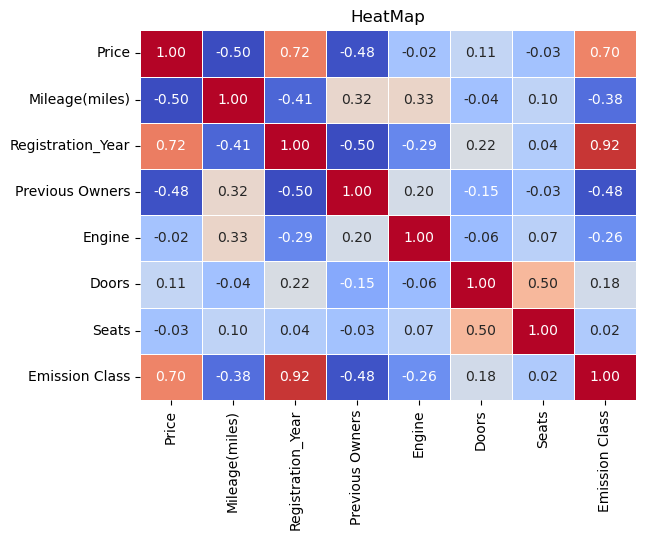

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = merged_df.corr(numeric_only=True)
print(corr_matrix)

sns.heatmap(corr_matrix,
            annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=0.5,
           cbar=False)
plt.title("HeatMap")
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

num_cols = ["Price","Mileage(miles)","Registration_Year",
            "Previous Owners","Doors","Seats","Engine","Emission Class"]

X = merged_df[num_cols].fillna(merged_df[num_cols].median())
X_std = StandardScaler().fit_transform(X)

pca = PCA().fit(X_std)

loadings = pd.DataFrame(
    pca.components_[:3],          # PC1~PC3까지만 보기
    columns=num_cols,
    index=["PC1","PC2","PC3"]
).T

print(loadings.abs().sort_values("PC1", ascending=False).head()) 

                        PC1       PC2       PC3
Registration_Year  0.503686  0.016572  0.078591
Emission Class     0.489966  0.004106  0.110225
Price              0.464642  0.056087  0.364538
Mileage(miles)     0.351530  0.206604  0.253345
Previous Owners    0.320250  0.021451  0.093858


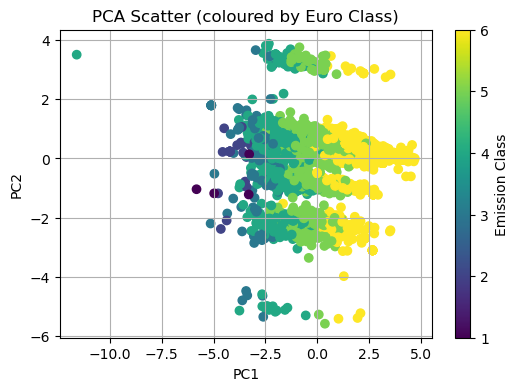

In [65]:
import matplotlib.pyplot as plt

# 두 개 주성분만으로 70 %↑ → 좌표
coords = pca.transform(X_std)[:, :2]

plt.figure(figsize=(6,4))
scatter = plt.scatter(coords[:,0], coords[:,1],
                      c=merged_df["Emission Class"],   # 배출가스 등급 색상
                      cmap="viridis", marker='o')
plt.colorbar(scatter, label="Emission Class")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA Scatter (coloured by Euro Class)")
plt.grid(True); plt.show()